<a href="https://colab.research.google.com/github/project0fightttt-bit/ensenble/blob/main/%EC%95%99%EC%83%81%EB%B8%94_k%3D2%EA%B5%B0%EC%A7%91%ED%99%94.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [116]:
!pip -q install pytrends tqdm openpyxl

In [117]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
import os
import time
from datetime import timedelta
from pytrends.request import TrendReq
from tqdm.auto import tqdm

In [118]:
netflix_global = 'https://top10.netflix.com/data/all-weeks-global.xlsx'
netflix_countries = 'https://top10.netflix.com/data/all-weeks-countries.xlsx'

In [119]:
global_excel_df = pd.read_excel(netflix_global)

/usr/local/lib/python3.12/dist-packages/openpyxl/styles/stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


In [120]:
countries_excel_df = pd.read_excel(netflix_countries)

/usr/local/lib/python3.12/dist-packages/openpyxl/styles/stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


In [121]:
global_excel_df

,week,category,weekly_rank,show_title,season_title,weekly_hours_viewed,runtime,weekly_views,cumulative_weeks_in_top_10
0,2026-02-08,Films (English),1,The Investigation of Lucy Letby,NaN,20500000,1.5833,12900000.0,1
1,2026-02-08,Films (English),2,The Rip,NaN,13900000,1.8833,7400000.0,4
2,2026-02-08,Films (English),3,KPop Demon Hunters,NaN,10100000,1.6667,6100000.0,34
3,2026-02-08,Films (English),4,In the Land of Saints and Sinners,NaN,8900000,1.7667,5000000.0,2
4,2026-02-08,Films (English),5,Sweet Home Alabama,NaN,8000000,1.8167,4400000.0,1
...,...,...,...,...,...,...,...,...,...
9635,2021-07-04,TV (Non-English),6,Elite,Elite: Season 1,10530000,NaN,NaN,1
9636,2021-07-04,TV (Non-English),7,Elite,Elite: Season 3,10200000,NaN,NaN,1
9637,2021-07-04,TV (Non-English),8,Elite,Elite: Season 2,10140000,NaN,NaN,1
9638,2021-07-04,TV (Non-English),9,Katla,Katla: Season 1,9190000,NaN,NaN,1


In [122]:
countries_excel_df

,country_name,country_iso2,week,category,weekly_rank,show_title,season_title,cumulative_weeks_in_top_10
0,Argentina,AR,2026-02-08,Films,1,In the Land of Saints and Sinners,NaN,2
1,Argentina,AR,2026-02-08,Films,2,Sweet Home Alabama,NaN,1
2,Argentina,AR,2026-02-08,Films,3,Trap,NaN,2
3,Argentina,AR,2026-02-08,Films,4,The Rip,NaN,4
4,Argentina,AR,2026-02-08,Films,5,Even If This Love Disappears Tonight,NaN,1
...,...,...,...,...,...,...,...,...
448955,Vietnam,VN,2021-07-04,TV,6,Reply 1988,Reply 1988: Season 1,1
448956,Vietnam,VN,2021-07-04,TV,7,"Nevertheless,","Nevertheless,: Limited Series",1
448957,Vietnam,VN,2021-07-04,TV,8,Too Hot to Handle,Too Hot to Handle: Season 2,1
448958,Vietnam,VN,2021-07-04,TV,9,Record of Ragnarok,Record of Ragnarok: Season 1,1


In [123]:
1.8833/27500000

6.848363636363636e-08

In [124]:
global_excel_df.week.sort_values()

,week
9639,2021-07-04
9616,2021-07-04
9615,2021-07-04
9614,2021-07-04
9613,2021-07-04
...,...
24,2026-02-08
23,2026-02-08
22,2026-02-08
20,2026-02-08


In [125]:
global_excel_df.describe()

,weekly_rank,weekly_hours_viewed,runtime,weekly_views,cumulative_weeks_in_top_10
count,9640.00000,9.640000e+03,5560.000000,5.560000e+03,9640.000000
mean,5.50000,1.794806e+07,3.694658,4.820647e+06,3.246058
std,2.87243,2.580518e+07,3.146217,5.597184e+06,3.644948
min,1.00000,7.000000e+05,0.000000,6.000000e+05,1.000000
25%,3.00000,5.800000e+06,1.700000,1.900000e+06,1.000000
50%,5.50000,1.080000e+07,2.200000,3.100000e+06,2.000000
75%,8.00000,2.030000e+07,5.200000,5.300000e+06,4.000000
max,10.00000,5.717600e+08,47.583300,6.800000e+07,34.000000


In [126]:
global_excel_df.category.value_counts()

,count
category,
Films (English),2410
Films (Non-English),2410
TV (English),2410
TV (Non-English),2410


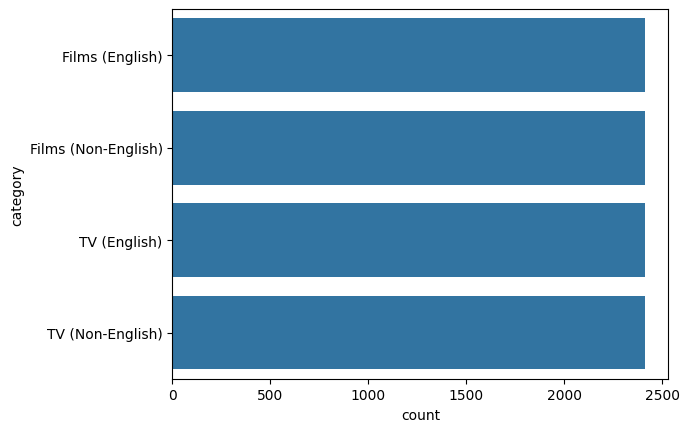

In [127]:
# 매 주마다 카테고리 별 top10 을 선정.
sns.countplot(data=global_excel_df.category)
plt.show()

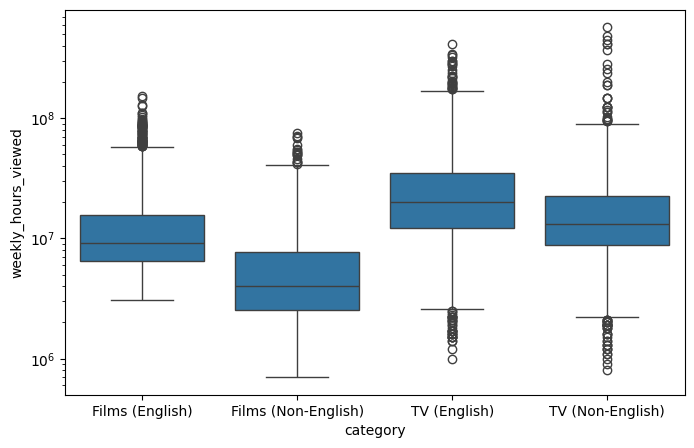

In [128]:
# 카테고리 별 총 시청시간 비교(성과 비교)
plt.figure(figsize=(8,5))
plt.yscale('log')
sns.boxplot(
    data=global_excel_df,
    x='category',
    y='weekly_hours_viewed')

plt.show()

>  TV 콘텐츠는 영화 대비 더 높은 시청시간을 기록하며,
일부 작품에서 매우 큰 성과가 나타나 분산이 크게 관찰된다.
이는 시리즈형 콘텐츠가 높은 참여도를 유도할 가능성이 있음을 시사한다.

> 하지만 시리즈형 콘텐츠의 경우 영화보다 더 많은 시청시간을 요구 하므로 weekly_views(weekly_hours_viewed:총소비시간​/runtime)으로 박스 플롯을 그리는게 좋을 것 같다.

> weekly_views : 해당 주에 몇번 시청된 것으로 추정되는 횟수. 즉, 얼마나 많은 사람이 소비했는가

In [129]:
global_excel_df['category_type'] = global_excel_df['category'].str.split().str[0]

In [130]:
global_excel_df.head()

,week,category,weekly_rank,show_title,season_title,weekly_hours_viewed,runtime,weekly_views,cumulative_weeks_in_top_10,category_type
0,2026-02-08,Films (English),1,The Investigation of Lucy Letby,NaN,20500000,1.5833,12900000.0,1,Films
1,2026-02-08,Films (English),2,The Rip,NaN,13900000,1.8833,7400000.0,4,Films
2,2026-02-08,Films (English),3,KPop Demon Hunters,NaN,10100000,1.6667,6100000.0,34,Films
3,2026-02-08,Films (English),4,In the Land of Saints and Sinners,NaN,8900000,1.7667,5000000.0,2,Films
4,2026-02-08,Films (English),5,Sweet Home Alabama,NaN,8000000,1.8167,4400000.0,1,Films


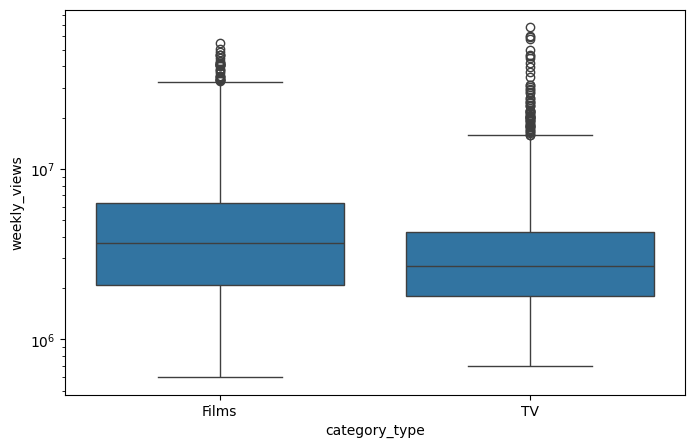

In [131]:
plt.figure(figsize=(8,5))
plt.yscale('log')
sns.boxplot(
    data=global_excel_df,
    x='category_type',
    y='weekly_views')
plt.show()

>   영화가 시리즈에 비해 더 많이 소비됨. 왜그럴까??(대중접근성?)

>   영화가 시리즈에 비해 분산정도가 더 큼 -> 성과편차(성과 스펙트럼)가 다양함.

>   tv 이상치가 위쪽에 많음 -> 극단적인 성공 사례가 영화에 비해 더 많이 존재함.
    *   메가 히트 시리즈?, 시즌 누적시청?

In [132]:
df = global_excel_df.copy()
df = df[df["week"] <= "2025-11-02"]
# 2) week 날짜형으로 변환 (정렬/시계열 순서 보장)
df["week"] = pd.to_datetime(df["week"], errors="coerce")

# 3) 작품 key 만들기: 시즌이 있으면 시즌 기준, 없으면 show_title
df["title_key"] = np.where(
    df["season_title"].notna() & (df["season_title"].astype(str).str.strip() != ""),
    df["show_title"].astype(str) + " - " + df["season_title"].astype(str),
    df["show_title"].astype(str)
)

# 4) 시계열 신호 선택
df["signal"] = df["weekly_hours_viewed"]

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9080 entries, 560 to 9639
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   week                        9080 non-null   datetime64[ns]
 1   category                    9080 non-null   object        
 2   weekly_rank                 9080 non-null   int64         
 3   show_title                  9080 non-null   object        
 4   season_title                4418 non-null   object        
 5   weekly_hours_viewed         9080 non-null   int64         
 6   runtime                     5000 non-null   float64       
 7   weekly_views                5000 non-null   float64       
 8   cumulative_weeks_in_top_10  9080 non-null   int64         
 9   category_type               9080 non-null   object        
 10  title_key                   9080 non-null   object        
 11  signal                      9080 non-null   int64         


In [133]:
# 작품별 weekly_hours_viewed 시계열 리스트 생성
series_df = (
    df.sort_values(["title_key", "week"])
      .groupby("title_key", as_index=False)
      .agg(hours_list=("signal", lambda x: list(x.astype(float))))
)

series_df.head()

,title_key,hours_list
0,#LadyRancho,[1300000.0]
1,'83,"[10530000.0, 3120000.0]"
2,(Un)lucky Sisters,"[2500000.0, 5800000.0, 2000000.0]"
3,10 Days of a Bad Man,"[6500000.0, 7300000.0]"
4,10 Days of a Good Man,"[4840000.0, 9990000.0]"


In [134]:
def extract_features(hours_list):

    h = np.array(hours_list, dtype=float)

    # 정규화 (패턴만 보기)
    norm = h / h.max() if h.max() > 0 else np.zeros_like(h)

    weeks_in_top10 = len(h)

    # peak 위치
    peak_idx = np.argmax(norm)
    peak_pos_ratio = peak_idx / (len(norm)-1) if len(norm) > 1 else 0

    # 초기 감소율
    if len(norm) >= 2 and norm[0] > 0:
        early_drop = (norm[0] - norm[1]) / norm[0]
    else:
        early_drop = 0

    # 전체 추세
    if len(norm) >= 2:
        x = np.arange(len(norm))
        slope_norm = np.polyfit(x, norm, 1)[0]
    else:
        slope_norm = 0

    # 누적 패턴
    area_norm = norm.sum()

    return pd.Series([
        weeks_in_top10,
        peak_pos_ratio,
        early_drop,
        slope_norm,
        area_norm
    ])


series_df[[
    "weeks_in_top10",
    "peak_pos_ratio",
    "early_drop",
    "slope_norm",
    "area_norm"
]] = series_df["hours_list"].apply(extract_features)

series_df.head()

,title_key,hours_list,weeks_in_top10,peak_pos_ratio,early_drop,slope_norm,area_norm
0,#LadyRancho,[1300000.0],1.0,0.0,0.000000,0.000000,1.000000
1,'83,"[10530000.0, 3120000.0]",2.0,0.0,0.703704,-0.703704,1.296296
2,(Un)lucky Sisters,"[2500000.0, 5800000.0, 2000000.0]",3.0,0.5,-1.320000,-0.043103,1.775862
3,10 Days of a Bad Man,"[6500000.0, 7300000.0]",2.0,1.0,-0.123077,0.109589,1.890411
4,10 Days of a Good Man,"[4840000.0, 9990000.0]",2.0,1.0,-1.064050,0.515516,1.484484


In [135]:
X = series_df[[
    "weeks_in_top10",
    "peak_pos_ratio",
    "early_drop",
    "slope_norm",
    "area_norm"
]]

# 스케일링 (매우 중요)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

results = {}

for k in [2, 3, 4]:
    kmeans = KMeans(n_clusters=k, n_init=10)
    labels = kmeans.fit_predict(X_scaled)

    score = silhouette_score(X_scaled, labels)
    results[k] = score

    print(f"k={k} → silhouette score: {score:.4f}")

k=2 → silhouette score: 0.4413
k=3 → silhouette score: 0.4804
k=4 → silhouette score: 0.5072


In [136]:
# ✅ 최종 k 선택
k_final = 2

kmeans_final = KMeans(n_clusters=k_final, n_init=10, random_state=42)
labels = kmeans_final.fit_predict(X_scaled)

# ✅ series_df에 cluster 컬럼 저장 (이걸 해야 평균시계열 코드가 돌아감)
series_df["cluster"] = labels

series_df["cluster"].value_counts()

,count
cluster,
1,2087
0,1183


In [137]:
cluster_profile = series_df.groupby("cluster")[[
    "weeks_in_top10", "peak_pos_ratio", "early_drop", "slope_norm", "area_norm"
]].mean().sort_index()

cluster_profile

,weeks_in_top10,peak_pos_ratio,early_drop,slope_norm,area_norm
cluster,,,,,
0,4.490279,0.572007,-0.595106,0.011315,2.683349
1,1.805462,0.007387,0.139885,-0.150256,1.418904


In [138]:
# early_drop 평균이 더 큰 cluster를 spike로 지정
spike_cluster = cluster_profile["early_drop"].idxmax()

series_df["type_stage1"] = np.where(
    series_df["cluster"] == spike_cluster,
    "spike",
    "long_term"
)

series_df["type_stage1"].value_counts()

,count
type_stage1,
spike,2087
long_term,1183


In [139]:
def to_norm(h):
    h = np.array(h, dtype=float)
    m = np.max(h) if len(h) > 0 else 0.0
    return (h / m) if m > 0 else np.zeros_like(h)

# norm_list 없으면 만들기
if "norm_list" not in series_df.columns:
    series_df["norm_list"] = series_df["hours_list"].apply(to_norm)

/tmp/ipython-input-2185579092.py:15: RuntimeWarning: Mean of empty slice
  cluster_means[c] = np.nanmean(padded, axis=0)


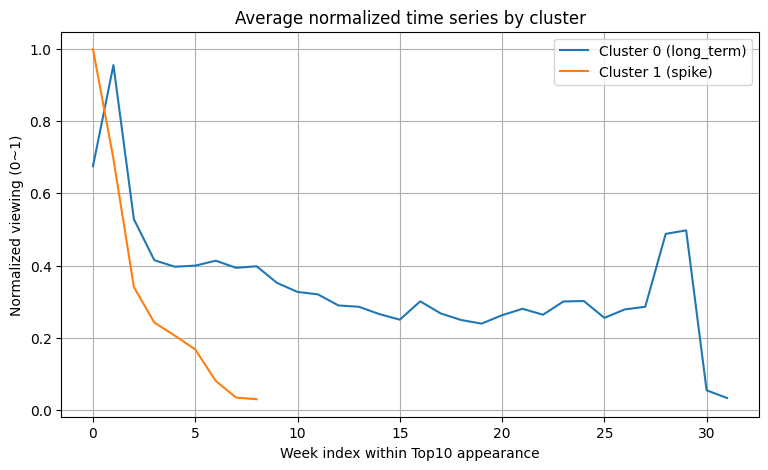

In [140]:
import matplotlib.pyplot as plt

max_len = int(series_df["norm_list"].apply(len).max())

cluster_means = {}

for c in sorted(series_df["cluster"].unique()):
    lists = series_df.loc[series_df["cluster"] == c, "norm_list"]

    padded = np.array([
        np.pad(x, (0, max_len - len(x)), constant_values=np.nan)
        for x in lists
    ], dtype=float)

    cluster_means[c] = np.nanmean(padded, axis=0)

plt.figure(figsize=(9,5))
for c, curve in cluster_means.items():
    label_name = "spike" if c == spike_cluster else "long_term"
    plt.plot(curve, label=f"Cluster {c} ({label_name})")

plt.title("Average normalized time series by cluster")
plt.xlabel("Week index within Top10 appearance")
plt.ylabel("Normalized viewing (0~1)")
plt.grid(True)
plt.legend()
plt.show()

In [141]:
spike_examples = series_df[series_df["type_stage1"]=="spike"].sort_values("early_drop", ascending=False).head(10)
long_examples  = series_df[series_df["type_stage1"]=="long_term"].sort_values("weeks_in_top10", ascending=False).head(10)

spike_examples[["title_key","weeks_in_top10","early_drop","peak_pos_ratio","slope_norm","area_norm"]]

,title_key,weeks_in_top10,early_drop,peak_pos_ratio,slope_norm,area_norm
1270,Jake Paul vs. Mike Tyson,2.0,0.961299,0.0,-0.961299,1.038701
2707,The Passion of the Christ,2.0,0.777778,0.0,-0.777778,1.222222
543,Cold Case: The Tylenol Murders - Cold Case: Th...,2.0,0.757447,0.0,-0.757447,1.242553
373,Blasted,2.0,0.741974,0.0,-0.741974,1.258026
2065,Ricky Gervais: Armageddon,2.0,0.738095,0.0,-0.738095,1.261905
1749,Narvik,4.0,0.738020,0.0,-0.306925,1.370458
1531,Lulli,3.0,0.735700,0.0,-0.434254,1.395792
2222,Sintonia - Sintonia: Season 4,2.0,0.727488,0.0,-0.727488,1.272512
1825,On My Block - On My Block: Season 4,2.0,0.726700,0.0,-0.726700,1.273300
396,Bogotá: City of the Lost,3.0,0.714286,0.0,-0.456710,1.372294


In [142]:
long_examples[["title_key","weeks_in_top10","early_drop","peak_pos_ratio","slope_norm","area_norm"]]

,title_key,weeks_in_top10,early_drop,peak_pos_ratio,slope_norm,area_norm
2289,Squid Game - Squid Game: Season 1,32.0,-6.101282,0.064516,-0.014658,4.773681
3224,"Yo soy Betty, la fea - Yo soy Betty, la fea: S...",30.0,0.019074,0.931034,0.009547,23.672235
444,Café con aroma de mujer - Café con aroma de mu...,28.0,-2.572105,0.074074,-0.028349,8.229439
3143,Wednesday - Wednesday: Season 1,28.0,-0.205316,0.037037,-0.021088,4.968878
1574,Manifest - Manifest: Season 1,25.0,0.120837,0.458333,-0.004779,11.972577
1704,Ms. Rachel - Ms. Rachel: Season 1,25.0,0.239669,0.000000,-0.010795,14.338843
150,All Quiet on the Western Front,23.0,-0.268254,0.045455,-0.021541,4.417772
2437,The Boss Baby,22.0,0.131610,0.238095,-0.015259,12.263705
2793,The Super Mario Bros. Movie,22.0,-3.229167,0.047619,-0.018258,7.655172
414,Bridgerton - Bridgerton: Season 2,22.0,-0.304217,0.047619,-0.022916,4.079606


*   spike 군집: 첫 주 peak + 2주차 급락(early_drop↑), 짧은 체류(weeks↓), 누적면적(area↓)

*   long_term 군집: 완만한 감소/유지(slope≈0 또는 약한 음수), 체류 길고(weeks↑), area↑

In [151]:
series_df["type_stage1"].value_counts()

,count
type_stage1,
spike,2087
long_term,1183


In [152]:
series_df[series_df["type_stage1"]=="long_term"]

,title_key,hours_list,weeks_in_top10,peak_pos_ratio,early_drop,slope_norm,area_norm,cluster,type_stage1,norm_list
2,(Un)lucky Sisters,"[2500000.0, 5800000.0, 2000000.0]",3.0,0.500000,-1.320000,-0.043103,1.775862,0,long_term,"[0.43103448275862066, 1.0, 0.3448275862068966]"
3,10 Days of a Bad Man,"[6500000.0, 7300000.0]",2.0,1.000000,-0.123077,0.109589,1.890411,0,long_term,"[0.8904109589041096, 1.0]"
4,10 Days of a Good Man,"[4840000.0, 9990000.0]",2.0,1.000000,-1.064050,0.515516,1.484484,0,long_term,"[0.4844844844844845, 1.0]"
7,13 Hours: The Secret Soldiers of Benghazi,"[12980000.0, 13270000.0, 9900000.0, 11800000.0]",4.0,0.333333,-0.022342,-0.052072,3.613414,0,long_term,"[0.9781461944235117, 1.0, 0.746043707611153, 0..."
10,1899 - 1899: Season 1,"[79270000.0, 87890000.0, 44620000.0, 27530000....",5.0,0.250000,-0.108742,-0.208442,2.925930,0,long_term,"[0.9019228581181021, 1.0, 0.5076800546137217, ..."
...,...,...,...,...,...,...,...,...,...,...
3259,iNumber Number: Jozi Gold,"[4000000.0, 9500000.0, 2000000.0]",3.0,0.500000,-1.375000,-0.105263,1.631579,0,long_term,"[0.42105263157894735, 1.0, 0.21052631578947367]"
3260,jeen-yuhs: A Kanye Trilogy,"[11460000.0, 12200000.0]",2.0,1.000000,-0.064572,0.060656,1.939344,0,long_term,"[0.9393442622950819, 1.0]"
3264,Ángela - Ángela: Limited Series,"[16800000.0, 34800000.0, 16900000.0, 10400000....",7.0,0.166667,-1.071429,-0.035612,3.793103,0,long_term,"[0.4827586206896552, 1.0, 0.48563218390804597,..."
3265,Ìjọ̀gbọ̀n,"[4200000.0, 5700000.0]",2.0,1.000000,-0.357143,0.263158,1.736842,0,long_term,"[0.7368421052631579, 1.0]"


In [153]:
df_merged = df.merge(
    series_df[["title_key", "type_stage1"]],
    on="title_key",
    how="left"
)

df_merged.head()

,week,category,weekly_rank,show_title,season_title,weekly_hours_viewed,runtime,weekly_views,cumulative_weeks_in_top_10,category_type,title_key,signal,type_stage1
0,2025-11-02,Films (English),1,A HOUSE OF DYNAMITE,NaN,60500000,1.9167,31600000.0,2,Films,A HOUSE OF DYNAMITE,60500000,long_term
1,2025-11-02,Films (English),2,KPop Demon Hunters,NaN,23300000,1.6667,14000000.0,20,Films,KPop Demon Hunters,23300000,long_term
2,2025-11-02,Films (English),3,Aileen: Queen of the Serial Killers,NaN,17500000,1.7333,10100000.0,1,Films,Aileen: Queen of the Serial Killers,17500000,spike
3,2025-11-02,Films (English),4,Ballad of a Small Player,NaN,11900000,1.7167,6900000.0,1,Films,Ballad of a Small Player,11900000,spike
4,2025-11-02,Films (English),5,The Perfect Neighbor,NaN,8400000,1.6500,5100000.0,3,Films,The Perfect Neighbor,8400000,long_term


In [166]:
df_long = df_merged[df_merged["type_stage1"] == "long_term"]
df_long

,week,category,weekly_rank,show_title,season_title,weekly_hours_viewed,runtime,weekly_views,cumulative_weeks_in_top_10,category_type,title_key,signal,type_stage1
0,2025-11-02,Films (English),1,A HOUSE OF DYNAMITE,NaN,60500000,1.9167,31600000.0,2,Films,A HOUSE OF DYNAMITE,60500000,long_term
1,2025-11-02,Films (English),2,KPop Demon Hunters,NaN,23300000,1.6667,14000000.0,20,Films,KPop Demon Hunters,23300000,long_term
4,2025-11-02,Films (English),5,The Perfect Neighbor,NaN,8400000,1.6500,5100000.0,3,Films,The Perfect Neighbor,8400000,long_term
5,2025-11-02,Films (English),6,The Woman in Cabin 10,NaN,7400000,1.5833,4700000.0,4,Films,The Woman in Cabin 10,7400000,long_term
7,2025-11-02,Films (English),8,The Twits,NaN,5700000,1.7167,3300000.0,3,Films,The Twits,5700000,long_term
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9065,2021-07-04,TV (English),6,Lucifer,Lucifer: Season 5,16890000,NaN,NaN,1,TV,Lucifer - Lucifer: Season 5,16890000,long_term
9066,2021-07-04,TV (English),7,Pokémon Journeys: The Series,Pokémon Journeys: The Series: Season 1,15350000,NaN,NaN,1,TV,Pokémon Journeys: The Series - Pokémon Journey...,15350000,long_term
9068,2021-07-04,TV (English),9,CoComelon,CoComelon: Season 3,11430000,NaN,NaN,1,TV,CoComelon - CoComelon: Season 3,11430000,long_term
9072,2021-07-04,TV (Non-English),3,"Newly Rich, Newly Poor","Newly Rich, Newly Poor: Season 1",28270000,NaN,NaN,1,TV,"Newly Rich, Newly Poor - Newly Rich, Newly Poo...",28270000,long_term


In [174]:
df_long.sort_values("cumulative_weeks_in_top_10")[[
    "title_key",
    "cumulative_weeks_in_top_10"
]].head(20)

,title_key,cumulative_weeks_in_top_10
9051,Haseen Dillruba,1
9047,Fatale,1
9046,Warcraft,1
9045,Kung Fu Panda 3,1
9041,Fear Street Part 1: 1994,1
9027,Virgin River - Virgin River: Season 1,1
9025,Atypical - Atypical: Season 4,1
9021,Virgin River - Virgin River: Season 3,1
9019,Last Summer,1
60,Nobody Wants This - Nobody Wants This: Season 2,1


In [173]:
df_long.describe()

,week,weekly_rank,weekly_hours_viewed,runtime,weekly_views,cumulative_weeks_in_top_10,signal
count,5312,5312.000000,5.312000e+03,2869.000000,2.869000e+03,5312.000000,5.312000e+03
mean,2023-08-26 02:25:50.602409728,5.235128,2.099486e+07,4.146217,4.933775e+06,4.165286,2.099486e+07
min,2021-07-04 00:00:00,1.000000,9.300000e+05,0.000000,7.000000e+05,1.000000,9.300000e+05
25%,2022-07-31 00:00:00,3.000000,6.957500e+06,1.700000,1.900000e+06,2.000000,6.957500e+06
50%,2023-08-20 00:00:00,5.000000,1.270000e+07,2.500000,3.100000e+06,3.000000,1.270000e+07
75%,2024-09-15 00:00:00,8.000000,2.400000e+07,6.300000,5.400000e+06,5.000000,2.400000e+07
max,2025-11-02 00:00:00,10.000000,5.717600e+08,23.366700,6.800000e+07,32.000000,5.717600e+08
std,NaN,2.852401,2.958821e+07,3.425913,5.742546e+06,4.068119,2.958821e+07
